In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'MetroPT2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.reset_index(drop=True, inplace=True)


In [40]:
width_pt = 416.1325
inches_per_pt = 1 / 72.27
width = width_pt * inches_per_pt

tex_fonts = {
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
}
plt.rcParams.update(tex_fonts)

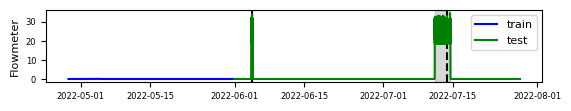

In [47]:
plt.figure(figsize=(width, width * 1/5))
plt.ylabel('Flowmeter')
# Plot failure one - air pressure
plt.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--')
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp <= '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp <= '2022-06-01T00:00:00'], color='blue', label='train')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color='green', label='test')
plt.legend()
plt.tight_layout()
plt.savefig('plots/flowmeter.pdf', transparent=True)

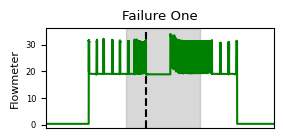

In [48]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Flowmeter')
# Plot failure one - air pressure
plt.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--')
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-06-04T06:00:00.300000000'), np.datetime64('2022-06-04T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure One')
plt.tight_layout()
plt.savefig('plots/flowmeter_f1.pdf', transparent=True)

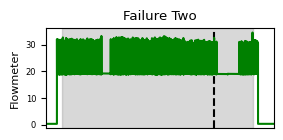

In [49]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Flowmeter')
# Plot failure one - air pressure
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Flowmeter'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-07-11T04:00:00.300000000'), np.datetime64('2022-07-14T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure Two')
plt.tight_layout()
plt.savefig('plots/flowmeter_f2.pdf', transparent=True)

/tmp/ipykernel_3837993/2651486.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('plots/oil.pdf', transparent=True)
/tmp/ipykernel_3837993/2651486.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('plots/oil.pdf', transparent=True)
/home/jakobs/metro-xai/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


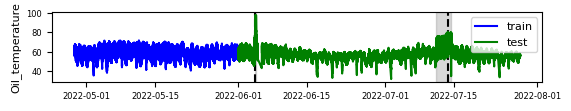

In [50]:
plt.figure(figsize=(width, width * 1/5))
plt.ylabel('Oil_temperature')
# Plot failure one - air pressure
plt.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--')
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp <= '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp <= '2022-06-01T00:00:00'], color='blue', label='train')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp > '2022-06-01T00:00:00'], color='green', label='test')
plt.legend()
plt.tight_layout()
plt.savefig('plots/oil.pdf', transparent=True)

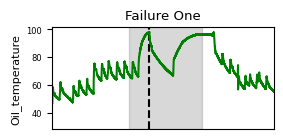

In [51]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Oil_temperature')
# Plot failure one - air pressure
plt.axvspan(xmin=np.datetime64('2022-06-04T10:19:24.300000000'), xmax=np.datetime64('2022-06-04T14:22:39.188000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-06-04T11:26:01.422000000'), color='black', linestyle='--')
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-06-04T06:00:00.300000000'), np.datetime64('2022-06-04T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure One')
plt.tight_layout()
plt.savefig('plots/oil_f1.pdf', transparent=True)

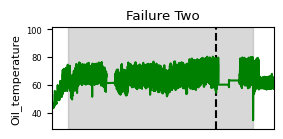

In [52]:
plt.figure(figsize=(0.5*width, 0.5*width * 1/2))
plt.ylabel('Oil_temperature')
# Plot failure one - air pressure
# Plot failure two - oil leak
plt.axvspan(xmin=np.datetime64('2022-07-11T10:10:18.948000000'), xmax=np.datetime64('2022-07-14T10:22:08.046000000'), color='gray', alpha=0.3)
plt.axvline(x=np.datetime64('2022-07-13T19:43:52.593000000'), color='black', linestyle='--')
plt.plot(df.timestamp[df.timestamp > '2022-06-01T00:00:00'], df['Oil_temperature'][df.timestamp > '2022-06-01T00:00:00'], color='green')
plt.xlim(np.datetime64('2022-07-11T04:00:00.300000000'), np.datetime64('2022-07-14T18:22:39.188000000'))
plt.xticks([])
plt.title('Failure Two')
plt.tight_layout()
plt.savefig('plots/oil_f2.pdf', transparent=True)